<br>
<br>

### ####################################################################
### PART 1: Data Pre-Processing

##### In this session, we will try to clean the dataset for data visualization and machine learning 


##### 1.1 Read Training and Testing Dataset
##### 1.2 Combine Training and Testing Dataset
##### 1.3 Remove Twitter Handles
##### 1.4 Remove Punctuation and Special Characters
##### 1.5 Remove Short Words
##### 1.6 Tokenization
##### 1.7 Stemming

### ####################################################################

<br>
<br>

In [1]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings
%matplotlib inline

In [2]:
pwd

'C:\\Users\\samue\\GitHub\\Twitter-Sentiment-Analysis'

<br>

### 1.1 Read Training and Testing Dataset

<br>

In [3]:
df_train = pd.read_csv('C://Users//samue//GitHub//Twitter-Sentiment-Analysis/Train.csv')

In [4]:
df_train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [5]:
df_train_original=df_train.copy()

In [6]:
df_test = pd.read_csv('C://Users//samue//GitHub//Twitter-Sentiment-Analysis/Test.csv')

In [7]:
df_test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [8]:
df_test_original=df_test.copy()

<br>

### 1.2 Combine Training and Testing Dataset 

<br>

In [9]:
dataset = df_train.append(df_test,ignore_index=True,sort=True)

In [10]:
dataset.head(10)

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...
7,8,0.0,the next school year is the year for exams.ð...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...


In [11]:
dataset.tail(10)

,id,label,tweet
49149,49150,NaN,loving lifeðºð¸âï¸ð #createyourfutu...
49150,49151,NaN,"black professor demonizes, proposes nazi style..."
49151,49152,NaN,learn how to think positive. #positive #ins...
49152,49153,NaN,"we love the pretty, happy and fresh you! #teen..."
49153,49154,NaN,2_damn_tuff-ruff_muff__techno_city-(ng005)-web...
49154,49155,NaN,thought factory: left-right polarisation! #tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...
49157,49158,NaN,"happy, at work conference: right mindset leads..."
49158,49159,NaN,"my song ""so glad"" free download! #shoegaze ..."


In [12]:
pwd

'C:\\Users\\samue\\GitHub\\Twitter-Sentiment-Analysis'

<br>

### 1.3 Remove Twitter Handles(@User)

<br>

In [13]:
def remove_pattern(text,pattern):
    
    r = re.findall(pattern,text)
    
    for i in r:
        text = re.sub(i,"",text)
    
    return text

In [14]:
dataset['cleantweet'] = np.vectorize(remove_pattern)(dataset['tweet'], "@[\w]*")

In [15]:
dataset.head(10)

,id,label,tweet,cleantweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannyâ¦
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams.ð...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won!!! love the land!!! #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here ! i'm it's so #gr8 !


<br>

### 1.4 Remove Punctuation and Special Characters

<br>

In [16]:
dataset['cleantweet'] = dataset['cleantweet'].str.replace("[^a-zA-Z#]", " ")

C:\Users\samue\AppData\Local\Temp/ipykernel_17104/4286730844.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['cleantweet'] = dataset['cleantweet'].str.replace("[^a-zA-Z#]", " ")


In [17]:
dataset.head(10)

,id,label,tweet,cleantweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams ...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here i m it s so #gr


<br>

### 1.5 Remove Short Words

<br>

In [18]:
dataset['cleantweet'] = dataset['cleantweet'].apply(lambda x: ' '.join([i for i in x.split() if len(i)>3]))

In [19]:
dataset.head(10)

,id,label,tweet,cleantweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fare talking before they leave chaos disp...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,next school year year exams think about that #...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,love land #allin #cavs #champions #cleveland #...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here


<br>

### 1.6 Tokenization

<br>

In [20]:
tokenized_tweet = dataset['cleantweet'].apply(lambda x: x.split())

In [21]:
tokenized_tweet.head(10)

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
5    [huge, fare, talking, before, they, leave, cha...
6                           [camping, tomorrow, danny]
7    [next, school, year, year, exams, think, about...
8    [love, land, #allin, #cavs, #champions, #cleve...
9                                      [welcome, here]
Name: cleantweet, dtype: object

<br>

### 1.7 Stemming

<br>

In [22]:
from nltk import PorterStemmer
# Stemmers lib remove morphological affixes from words, leaving only the word stem.
ps = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [ps.stem(i) for i in x])

In [23]:
tokenized_tweet.head(10)

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
5    [huge, fare, talk, befor, they, leav, chao, di...
6                              [camp, tomorrow, danni]
7    [next, school, year, year, exam, think, about,...
8    [love, land, #allin, #cav, #champion, #clevela...
9                                       [welcom, here]
Name: cleantweet, dtype: object

In [24]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

In [25]:
dataset['Tidy_Tweets'] = tokenized_tweet

In [26]:
dataset.head(10)

,id,label,tweet,cleantweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...,thank #lyft credit caus they offer wheelchair ...
2,3,0.0,bihday your majesty,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation,factsguid societi #motiv
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fare talking before they leave chaos disp...,huge fare talk befor they leav chao disput whe...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny,camp tomorrow danni
7,8,0.0,the next school year is the year for exams.ð...,next school year year exams think about that #...,next school year year exam think about that #s...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,love land #allin #cavs #champions #cleveland #...,love land #allin #cav #champion #cleveland #cl...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here,welcom here


<br>
<br>

### ####################################################################
### PART 2:Data Visualisation
##### 2.1 WordCloud
##### 2.2 Bar plots
### ####################################################################

<br>
<br>

### 2.1 WordCloud

In [27]:
!pip install wordcloud
#word cloud filled with lots of words in different sizes, which represent the frequency or the importance of each word
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
#This library provides extensive file format support, an efficient internal representation, and fairly powerful image processing capabilities.
import urllib  
#urllib is a package that collects several modules for working with URLs
import requests 
# Requests is an elegant and simple HTTP library for Python, built for human beings

In [28]:
positive_words = ' '.join(text for text in dataset['cleantweet'][dataset['label']==0])

In [29]:
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))
image_colors = ImageColorGenerator(Mask)
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(positive_words)

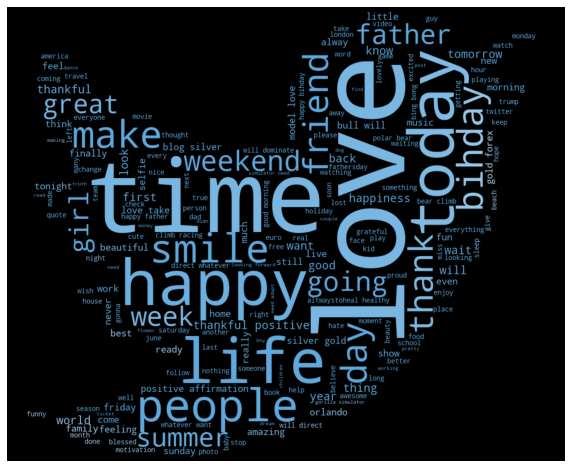

In [30]:
plt.figure(figsize=(10,20))
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")
plt.axis('off')
plt.show()

In [31]:
negative_words = ' '.join(text for text in dataset['cleantweet'][dataset['label']==1])

In [32]:
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))
image_colors = ImageColorGenerator(Mask)
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(negative_words)

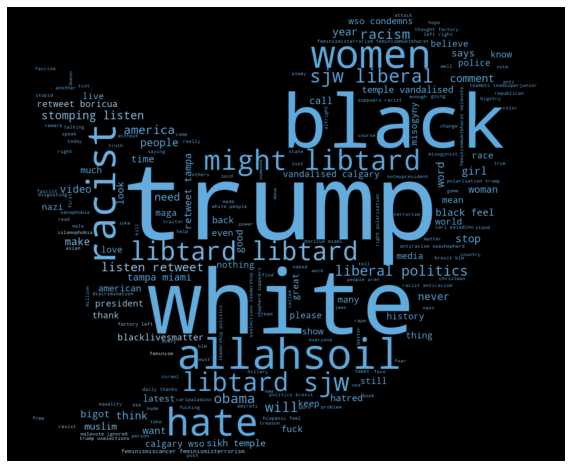

In [33]:
plt.figure(figsize=(10,20))
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")
plt.axis('off')
plt.show()

In [34]:
def Hashtags_Extract(x):
    hashtags=[]

    for i in x:
        ht = re.findall(r'#(\w+)',i)
        hashtags.append(ht)
    
    return hashtags

In [35]:
Positive_HT = Hashtags_Extract(dataset['cleantweet'][dataset['label']==0])

In [36]:
Positive_HT

[['run'],
 ['lyft', 'disapointed', 'getthanked'],
 [],
 ['model'],
 ['motivation'],
 ['allshowandnogo'],
 [],
 ['school',
  'exams',
  'hate',
  'imagine',
  'actorslife',
  'revolutionschool',
  'girl'],
 ['allin', 'cavs', 'champions', 'cleveland', 'clevelandcavaliers'],
 [],
 ['ireland', 'blog', 'silver', 'gold', 'forex'],
 ['orlando',
  'standwithorlando',
  'pulseshooting',
  'orlandoshooting',
  'biggerproblems',
  'selfish',
  'heabreaking',
  'values',
  'love'],
 ['gettingfed'],
 ['got', 'junior', 'yugyoem', 'omg'],
 ['thankful', 'positive'],
 ['friday', 'cookies'],
 [],
 ['euro'],
 ['badday', 'coneofshame', 'cats', 'pissed', 'funny', 'laughs'],
 ['wine', 'weekend'],
 ['tgif', 'gamedev', 'indiedev', 'indiegamedev', 'squad'],
 ['upsideofflorida', 'shopalyssas', 'love'],
 ['smiles', 'media', 'pressconference', 'antalya', 'turkey', 'throwback'],
 ['ica'],
 [],
 ['rip', 'orlando'],
 [],
 ['alohafriday', 'time', 'not', 'exist', 'positivevibes', 'hawaiian'],
 [],
 ['goodnight', 'badm

In [37]:
Positive_HT_Unnest = sum(Positive_HT,[])

In [38]:
#Positive_HT_Unnest

In [39]:
Negative_HT = Hashtags_Extract(dataset['cleantweet'][dataset['label']==1])

In [40]:
#Negative_HT

In [41]:
Negative_HT_Unnest = sum(Negative_HT,[])

In [42]:
#Negative_HT_Unnest

In [43]:
word_freq_positive = nltk.FreqDist(Positive_HT_Unnest)

In [44]:
word_freq_positive

FreqDist({'love': 1596, 'positive': 880, 'smile': 581, 'healthy': 576, 'thankful': 496, 'fun': 463, 'life': 431, 'summer': 395, 'model': 365, 'cute': 365, ...})

In [45]:
df_positive = pd.DataFrame({'Hashtags':list(word_freq_positive.keys()),'Count':list(word_freq_positive.values())})

In [46]:
df_positive

,Hashtags,Count
0,run,34
1,lyft,2
2,disapointed,1
3,getthanked,2
4,model,365
...,...,...
20744,kamp,1
20745,ucsd,1
20746,berlincitygirl,1
20747,genf,1


<AxesSubplot:xlabel='Count', ylabel='Hashtags'>

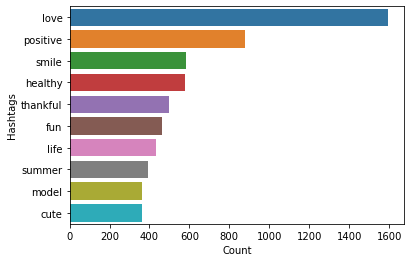

In [47]:
df_positive_plot = df_positive.nlargest(10,columns='Count')
sns.barplot(data=df_positive_plot,y='Hashtags',x='Count')

In [48]:
word_freq_negative = nltk.FreqDist(Negative_HT_Unnest)

In [49]:
df_negative = pd.DataFrame({'Hashtags':list(word_freq_negative.keys()),'Count':list(word_freq_negative.values())})

In [50]:
df_negative

,Hashtags,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5
...,...,...
1805,jumpedtheshark,1
1806,freemilo,5
1807,milo,4
1808,mailboxpride,1


Using Bag of Words method to extract features from text documents

<AxesSubplot:xlabel='Count', ylabel='Hashtags'>

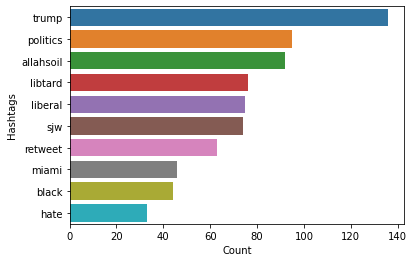

In [51]:
df_negative_plot = df_negative.nlargest(10,columns='Count') 
sns.barplot(data=df_negative_plot,y='Hashtags',x='Count')

<br>
<br>

### ##################################################################
### Part 3: Machine Learning
##### In this session, we will try to apply three machine learning method(Logistic Regression,XGBoost,Decision Trees) 
##### with two feature extraction(Bag-of-Words,TF-IDF) to see which one has the best performace(f1 score)

##### 3.1 Extract features from dataset by using Bag-of-Words and TF-IDF
##### 3.2 Logistic Regression with Bag-of-Words Features
##### 3.3 Logistic Regression with TF-IDF Features
##### 3.4 XGBoost with Bag-of-Words Features
##### 3.5 XGBoost with TF-IDF Features
##### 3.6 Decision Trees with Bag-of-Words Features
##### 3.7 Decision Trees with Bag-of-Words Features
##### 3.8 Model Performance Comparison with  Bag-of-Words Features
##### 3.9 Model Performance Comparison with  TF-IDF Features
##### 3.10 Logistic Regression model with both the feature extraction techniques (Bag-of-Words and TF-IDF)
##### 3.11 XGBoost Model with Bag-of-Words features on test data



### ####################################################################

<br>
<br>

In [52]:
### 3.1 Extract features from dataset by using Bag-of-Words and TF-IDF

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

bow = bow_vectorizer.fit_transform(dataset['cleantweet'])
df_bow = pd.DataFrame(bow.todense())

In [54]:
df_bow

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


TF-IDF Features

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_df=0.90, min_df=2,max_features=1000,stop_words='english')
tfidf_matrix=tfidf.fit_transform(dataset['cleantweet'])
df_tfidf = pd.DataFrame(tfidf_matrix.todense())

In [56]:
df_tfidf

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
train_bow = bow[:31962]
train_bow.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [58]:
train_tfidf_matrix = tfidf_matrix[:31962]
train_tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
x_train_bow, x_valid_bow, y_train_bow, y_valid_bow = train_test_split(train_bow,df_train['label'],test_size=0.3,random_state=2)

In [61]:
x_train_tfidf, x_valid_tfidf, y_train_tfidf, y_valid_tfidf = train_test_split(train_tfidf_matrix,df_train['label'],test_size=0.3,random_state=17)

<br>

### 3.2 Logistic Regression with Bag-of-Words Features

<br>

In [62]:
from sklearn.metrics import f1_score

In [63]:
from sklearn.linear_model import LogisticRegression
Log_Reg = LogisticRegression(random_state=0,solver='lbfgs')

In [64]:
Log_Reg.fit(x_train_bow,y_train_bow)

LogisticRegression(random_state=0)

In [65]:
prediction_bow = Log_Reg.predict_proba(x_valid_bow)
prediction_bow

array([[9.44815280e-01, 5.51847201e-02],
       [9.99328530e-01, 6.71470066e-04],
       [9.11967594e-01, 8.80324063e-02],
       ...,
       [8.65906496e-01, 1.34093504e-01],
       [9.59979980e-01, 4.00200197e-02],
       [9.69809475e-01, 3.01905252e-02]])

In [66]:
prediction_int = prediction_bow[:,1]>=0.3
prediction_int = prediction_int.astype(np.int)
prediction_int

C:\Users\samue\AppData\Local\Temp/ipykernel_17104/1893411806.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  prediction_int = prediction_int.astype(np.int)


array([0, 0, 0, ..., 0, 0, 0])

In [67]:
log_bow = f1_score(y_valid_bow, prediction_int)
log_bow

0.5315391084945332

<br>

### 3.3 Logistic Regression with TF-IDF Features

<br>

In [68]:
Log_Reg.fit(x_train_bow,y_train_bow)

LogisticRegression(random_state=0)

In [69]:
prediction_tfidf = Log_Reg.predict_proba(x_valid_tfidf)
prediction_tfidf

array([[0.96331736, 0.03668264],
       [0.96705536, 0.03294464],
       [0.92812713, 0.07187287],
       ...,
       [0.91557683, 0.08442317],
       [0.96446108, 0.03553892],
       [0.98009171, 0.01990829]])

In [70]:
prediction_int = prediction_tfidf[:,1]>=0.3
prediction_int = prediction_int.astype(np.int)
prediction_int

C:\Users\samue\AppData\Local\Temp/ipykernel_17104/3323184114.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  prediction_int = prediction_int.astype(np.int)


array([0, 0, 0, ..., 0, 0, 0])

In [71]:
log_tfidf = f1_score(y_valid_tfidf, prediction_int)
log_tfidf

0.5245559038662486

<br>

### 3.4 XGBoost with Bag-of-Words Features

<br>

In [72]:
from xgboost import XGBClassifier

In [73]:
model_bow = XGBClassifier(random_state=22,learning_rate=0.9)

In [74]:
model_bow.fit(x_train_bow, y_train_bow)

C:\Users\samue\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:22:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.9, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=22,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [75]:
xgb = model_bow.predict_proba(x_valid_bow)
xgb

array([[0.96387047, 0.03612953],
       [0.9965037 , 0.00349629],
       [0.92422247, 0.07577751],
       ...,
       [0.9330268 , 0.06697322],
       [0.92422247, 0.07577751],
       [0.92422247, 0.07577751]], dtype=float32)

In [76]:
xgb=xgb[:,1]>=0.3
xgb_int=xgb.astype(np.int)
xgb_bow=f1_score(y_valid_bow,xgb_int)
xgb_bow

C:\Users\samue\AppData\Local\Temp/ipykernel_17104/2120165332.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  xgb_int=xgb.astype(np.int)


0.5464834276475343

<br>

### 3.5 XGBoost with TF-IDF Features

<br>

In [77]:
model_tfidf = XGBClassifier(random_state=29,learning_rate=0.7)

In [78]:
model_tfidf.fit(x_train_tfidf, y_train_tfidf)

C:\Users\samue\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:22:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.7, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=29,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [79]:
xgb_tfidf=model_tfidf.predict_proba(x_valid_tfidf)
xgb_tfidf

array([[0.99893254, 0.00106748],
       [0.98325944, 0.01674054],
       [0.9431977 , 0.05680225],
       ...,
       [0.9463037 , 0.0536963 ],
       [0.96896386, 0.03103614],
       [0.997193  , 0.00280705]], dtype=float32)

In [80]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
xgb_tfidf=xgb_tfidf[:,1]>=0.3

# converting the results to integer type
xgb_int_tfidf=xgb_tfidf.astype(np.int)

# calculating f1 score
score=f1_score(y_valid_tfidf,xgb_int_tfidf)

score

C:\Users\samue\AppData\Local\Temp/ipykernel_17104/3838002970.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  xgb_int_tfidf=xgb_tfidf.astype(np.int)


0.5479674796747966

<br>

### 3.6 Decision Trees with Bag-of-Words Features

<br>

In [81]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(criterion='entropy', random_state=1)

In [82]:
dct.fit(x_train_bow,y_train_bow)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [83]:
dct_bow = dct.predict_proba(x_valid_bow)
dct_bow

array([[1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       ...,
       [0.5, 0.5],
       [1. , 0. ],
       [1. , 0. ]])

In [84]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
dct_bow=dct_bow[:,1]>=0.3

# converting the results to integer type
dct_int_bow=dct_bow.astype(np.int)

# calculating f1 score
dct_score_bow=f1_score(y_valid_bow,dct_int_bow)

dct_score_bow

C:\Users\samue\AppData\Local\Temp/ipykernel_17104/664194549.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dct_int_bow=dct_bow.astype(np.int)


0.4900422450211225

<br> 

### 3.7 Decision Trees with Bag-of-Words Features

<br> 

In [85]:
dct.fit(x_train_tfidf,y_train_tfidf)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [86]:
dct_tfidf = dct.predict_proba(x_valid_tfidf)
dct_tfidf

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [87]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
dct_tfidf=dct_tfidf[:,1]>=0.3

# converting the results to integer type
dct_int_tfidf=dct_tfidf.astype(np.int)

# calculating f1 score
dct_score_tfidf=f1_score(y_valid_tfidf,dct_int_tfidf)

dct_score_tfidf

C:\Users\samue\AppData\Local\Temp/ipykernel_17104/424882634.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dct_int_tfidf=dct_tfidf.astype(np.int)


0.5094043887147335

<br>

### 3.8 Model Performance Comparison with  Bag-of-Words Features

<br>

In [88]:
Algo_1 = ['LogisticRegression(Bag-of-Words)','XGBoost(Bag-of-Words)','DecisionTree(Bag-of-Words)']

score_1 = [log_bow,xgb_bow,dct_score_bow]

compare_1 = pd.DataFrame({'Model':Algo_1,'F1_Score':score_1},index=[i for i in range(1,4)])

compare_1.T

,1,2,3
Model,LogisticRegression(Bag-of-Words),XGBoost(Bag-of-Words),DecisionTree(Bag-of-Words)
F1_Score,0.531539,0.546483,0.490042


Text(0, 0.5, 'SCORE')

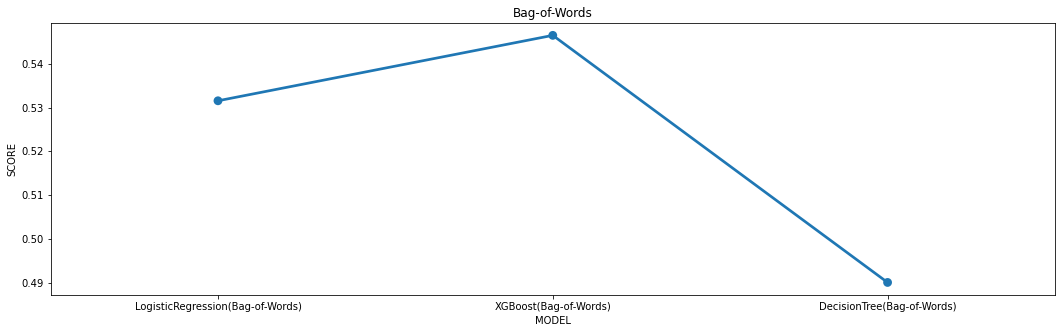

In [89]:
plt.figure(figsize=(18,5))

sns.pointplot(x='Model',y='F1_Score',data=compare_1)

plt.title('Bag-of-Words')
plt.xlabel('MODEL')
plt.ylabel('SCORE')


<br>

##### In the above comparision graph, We can see that the  XGBoost Model  has the best F1 score

<br>
<br>

<br>

### 3.9 Model Performance Comparison with  TF-IDF Features

<br>

In [90]:
Algo_2 = ['LogisticRegression(TF-IDF)','XGBoost(TF-IDF)','DecisionTree(TF-IDF)']
score_2 = [log_tfidf,score,dct_score_tfidf]
compare_2 = pd.DataFrame({'Model':Algo_2,'F1_Score':score_2},index=[i for i in range(1,4)])
compare_2.T

,1,2,3
Model,LogisticRegression(TF-IDF),XGBoost(TF-IDF),DecisionTree(TF-IDF)
F1_Score,0.524556,0.547967,0.509404


Text(0, 0.5, 'SCORE')

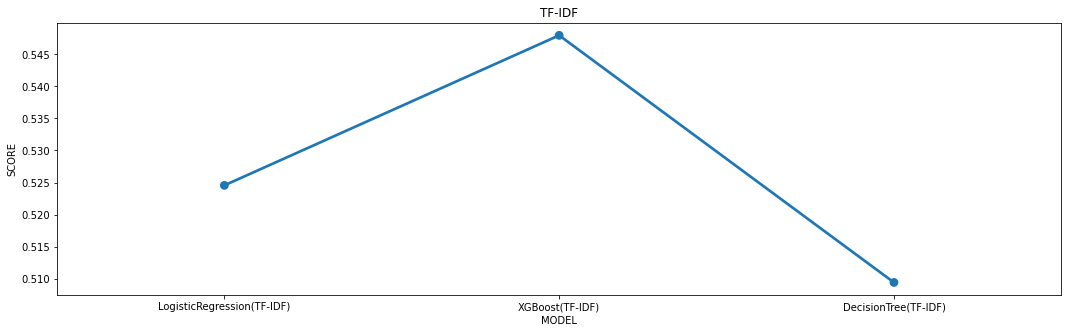

In [91]:
plt.figure(figsize=(18,5))
sns.pointplot(x='Model',y='F1_Score',data=compare_2)
plt.title('TF-IDF')
plt.xlabel('MODEL')
plt.ylabel('SCORE')


<br>

##### In the above comparision graph, We can see that the  XGBoost Model  has the best F1 score

<br>
<br>

<br>

### 3.10 Logistic Regression model with both the feature extraction techniques (Bag-of-Words and TF-IDF)

<br>

In [92]:

Algo_best = ['XGBoost(Bag-of-Words)','XGBoost(TF-IDF)']

score_best = [log_bow,log_tfidf]

compare_best = pd.DataFrame({'Model':Algo_best,'F1_Score':score_best},index=[i for i in range(1,3)])

compare_best.T

,1,2
Model,XGBoost(Bag-of-Words),XGBoost(TF-IDF)
F1_Score,0.531539,0.524556


<AxesSubplot:xlabel='Model', ylabel='F1_Score'>

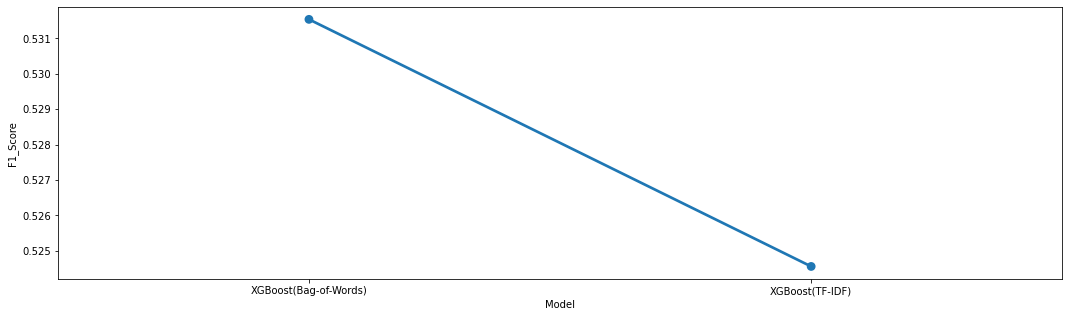

In [93]:
plt.figure(figsize=(18,5))
sns.pointplot(x='Model',y='F1_Score',data=compare_best)

<br>

##### In the above comparision graph, We can see that the  XGBoost Model with Bag-of-Words features has the best F1 score

<br>
<br>




<br>

### 3.11 XGBoost Model with Bag-of-Words features on test data

<br>

In [94]:

test_tfidf = tfidf_matrix[31962:]
test_pred = Log_Reg.predict_proba(test_tfidf)

test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)

df_test['label'] = test_pred_int

submission = df_test[['id','label']]
submission.to_csv('result.csv', index=False)

C:\Users\samue\AppData\Local\Temp/ipykernel_17104/4070701166.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_pred_int = test_pred_int.astype(np.int)


In [95]:
result = pd.read_csv('result.csv')


In [96]:
pwd

'C:\\Users\\samue\\GitHub\\Twitter-Sentiment-Analysis'